### Import libraries

In [3]:
import pandas as pd
import missingno

### Import Dataset

In [4]:
df = pd.read_csv('BuildingPermitsBrampton.csv')
df.head(5)

,X,Y,GIS_ID,ADDRESS,PERMITNUMBER,SUBDESC,WORKDESC,ISSUEDATE,INDATE,STATUSDESC,PROCESSDATE,BUILDER,CONTRACTOR,EXPIRYDATE,GFA,SECOND_UNIT,BEDROOMS,STOREYS,DWELLINGS
0,-79.820498,43.689158,100753,"137 Fairhill Ave, Brampton, ON,",01-121747-000-00,Single Family Detached,New Complete Building,2001-12-13T05:00:00.000Z,2001-11-30T05:00:00.000Z,Closed,NaN,BAYCLIFFE HOMES,1113669 ONTARIO LIMITED,NaN,216.27,NaN,NaN,NaN,1.0
1,-79.820524,43.689064,100754,"135 Fairhill Ave, Brampton, ON,",01-120328-000-00,Single Family Detached,New Complete Building,2001-12-07T05:00:00.000Z,2001-10-10T04:00:00.000Z,Closed,NaN,BAYCLIFFE HOMES,1113669 ONTARIO LIMITED,NaN,202.89,NaN,NaN,NaN,1.0
2,-79.820531,43.688958,100755,"133 Fairhill Ave, Brampton, ON,",01-120329-000-00,Single Family Detached,New Complete Building,2001-12-07T05:00:00.000Z,2001-10-10T04:00:00.000Z,Closed,NaN,BAYCLIFFE HOMES,1113669 ONTARIO LIMITED,NaN,197.78,NaN,NaN,NaN,1.0
3,-79.820545,43.688867,100756,"131 Fairhill Ave, Brampton, ON,",02-126584-000-00,Single Family Detached,New Complete Building,2002-06-20T04:00:00.000Z,2002-05-30T04:00:00.000Z,Closed,NaN,BAYCLIFFE HOMES,1113669 ONTARIO LIMITED,NaN,127.55,NaN,NaN,NaN,1.0
4,-79.820545,43.688867,100756,"131 Fairhill Ave, Brampton, ON,",03-143093-000-00,Single Family Detached,Revision,2003-04-04T04:00:00.000Z,2003-04-03T04:00:00.000Z,Closed,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


### Basic Analysis

In [6]:
#Number of rows and columns in the dataframe
df.shape

(162935, 19)

In [8]:
#Data types of each column
df.dtypes

X               float64
Y               float64
GIS_ID            int64
ADDRESS          object
PERMITNUMBER     object
SUBDESC          object
WORKDESC         object
ISSUEDATE        object
INDATE           object
STATUSDESC       object
PROCESSDATE      object
BUILDER          object
CONTRACTOR       object
EXPIRYDATE       object
GFA             float64
SECOND_UNIT      object
BEDROOMS         object
STOREYS          object
DWELLINGS       float64
dtype: object

In [7]:
#number of missing values in each column
df.isnull().sum()

X                    0
Y                    0
GIS_ID               0
ADDRESS              4
PERMITNUMBER         0
SUBDESC          26515
WORKDESC         26515
ISSUEDATE        33757
INDATE           26527
STATUSDESC       26515
PROCESSDATE     134177
BUILDER          92750
CONTRACTOR       92047
EXPIRYDATE      162227
GFA              85192
SECOND_UNIT     156965
BEDROOMS        113383
STOREYS         115324
DWELLINGS        81832
dtype: int64

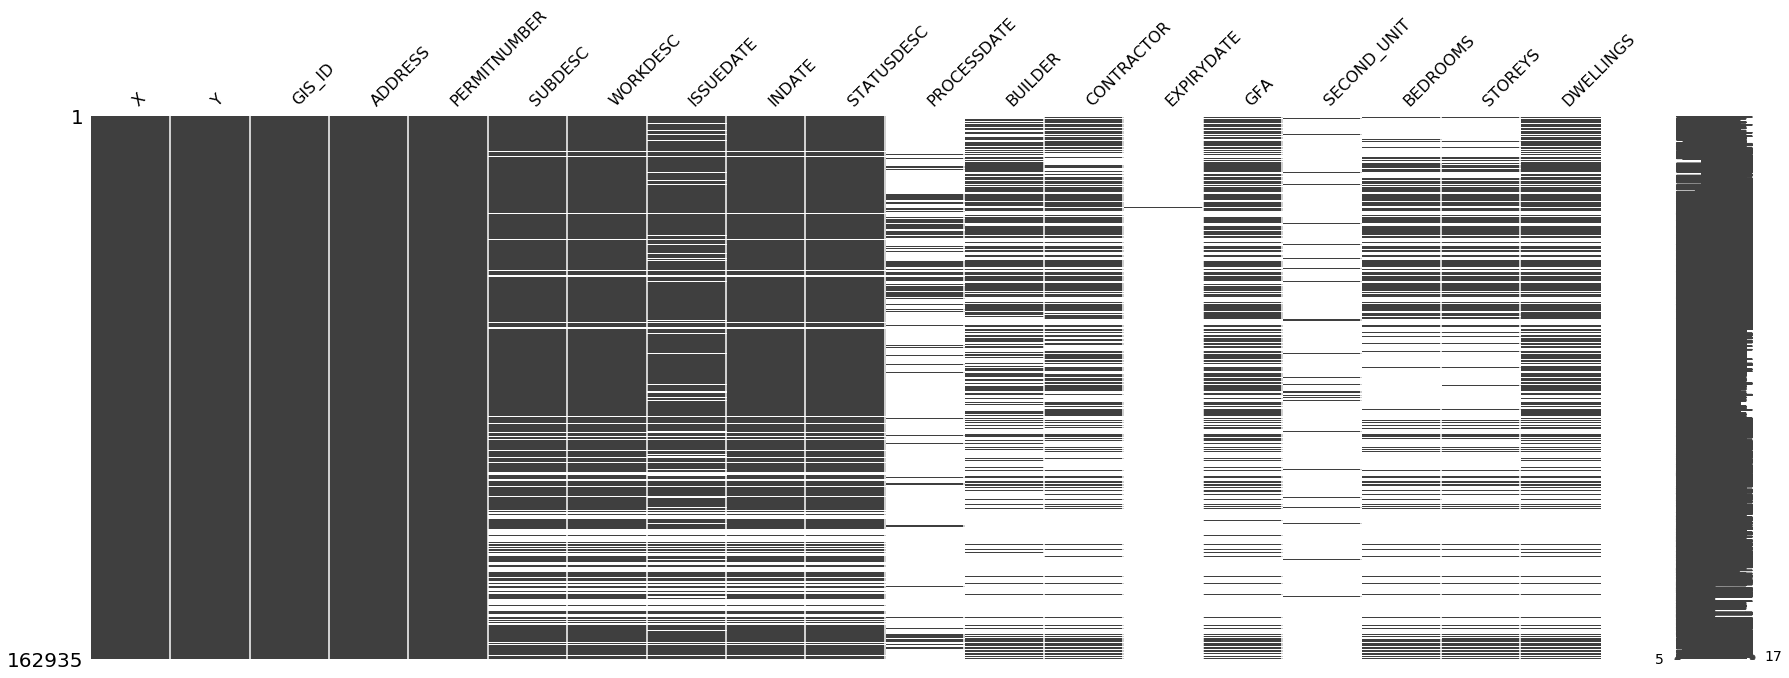

In [9]:
#graphical representation of the missing values in the dataframe
missingno.matrix(df, figsize = (30,10))

In [10]:
#Name of all columns
cols = list(df.columns.values)
print (cols)

['X', 'Y', 'GIS_ID', 'ADDRESS', 'PERMITNUMBER', 'SUBDESC', 'WORKDESC', 'ISSUEDATE', 'INDATE', 'STATUSDESC', 'PROCESSDATE', 'BUILDER', 'CONTRACTOR', 'EXPIRYDATE', 'GFA', 'SECOND_UNIT', 'BEDROOMS', 'STOREYS', 'DWELLINGS']


### Data Cleaning

In [11]:
#Removing the rows in which all the necessary columns are missing values
df = df.dropna(subset=['SUBDESC', 'WORKDESC', 'STATUSDESC', 'ISSUEDATE', 'INDATE', 'BUILDER','CONTRACTOR'], how='all')

In [12]:
#Removing the rows in which the permit has no description of the work done
df = df.dropna(subset=['SUBDESC', 'WORKDESC'], how='all')

In [13]:
#Removing the rows in which the permit has no date
df = df.dropna(subset=['ISSUEDATE', 'INDATE'], how='all')

In [14]:
#Creating a new filtered dataframe by dropping columns which are missing too many values
df = df[['PERMITNUMBER','ADDRESS', 'SUBDESC', 'WORKDESC', 'STATUSDESC', 'ISSUEDATE', 'INDATE', 'BUILDER', 'CONTRACTOR', 'X', 'Y', 'GIS_ID']]
df.head()

,PERMITNUMBER,ADDRESS,SUBDESC,WORKDESC,STATUSDESC,ISSUEDATE,INDATE,BUILDER,CONTRACTOR,X,Y,GIS_ID
0,01-121747-000-00,"137 Fairhill Ave, Brampton, ON,",Single Family Detached,New Complete Building,Closed,2001-12-13T05:00:00.000Z,2001-11-30T05:00:00.000Z,BAYCLIFFE HOMES,1113669 ONTARIO LIMITED,-79.820498,43.689158,100753
1,01-120328-000-00,"135 Fairhill Ave, Brampton, ON,",Single Family Detached,New Complete Building,Closed,2001-12-07T05:00:00.000Z,2001-10-10T04:00:00.000Z,BAYCLIFFE HOMES,1113669 ONTARIO LIMITED,-79.820524,43.689064,100754
2,01-120329-000-00,"133 Fairhill Ave, Brampton, ON,",Single Family Detached,New Complete Building,Closed,2001-12-07T05:00:00.000Z,2001-10-10T04:00:00.000Z,BAYCLIFFE HOMES,1113669 ONTARIO LIMITED,-79.820531,43.688958,100755
3,02-126584-000-00,"131 Fairhill Ave, Brampton, ON,",Single Family Detached,New Complete Building,Closed,2002-06-20T04:00:00.000Z,2002-05-30T04:00:00.000Z,BAYCLIFFE HOMES,1113669 ONTARIO LIMITED,-79.820545,43.688867,100756
4,03-143093-000-00,"131 Fairhill Ave, Brampton, ON,",Single Family Detached,Revision,Closed,2003-04-04T04:00:00.000Z,2003-04-03T04:00:00.000Z,NaN,NaN,-79.820545,43.688867,100756


### Cleaning the Issuedate and Indate columns

In [15]:
#changing the data type of the Issuedate to date-time
#removing the time zone from the values
df['ISSUEDATE'] = pd.to_datetime(df.ISSUEDATE)
df['ISSUEDATE'] = df['ISSUEDATE'].dt.tz_convert(None)

In [16]:
#changing the data type of the Indate to date-time
#removing the time zone from the values
df['INDATE'] = pd.to_datetime(df.INDATE)
df['INDATE'] = df['INDATE'].dt.tz_convert(None)

In [17]:
#Normalizing the Issuedate and Indate columns to only have date values and not time
df['ISSUEDATE'] = pd.to_datetime(df['ISSUEDATE']).dt.normalize()
df['INDATE'] = pd.to_datetime(df['INDATE']).dt.normalize()

##### Filling missing values in the Issuedate column

In [18]:
#Getting the time taken between permit applied and permit issued for all rows and storing in a temporary 'timetaken' column
df['timetaken'] = (df['ISSUEDATE'] - df['INDATE']).dt.days

In [19]:
#Getting the average of timetaken, rounding it off
round(df['timetaken'].mean())

49

In [20]:
#Generating Issuedate values where missing by adding average time taken to Indate values
df['ISSUEDATE'] = df['ISSUEDATE'].fillna(df['INDATE'] + pd.DateOffset(days=49))

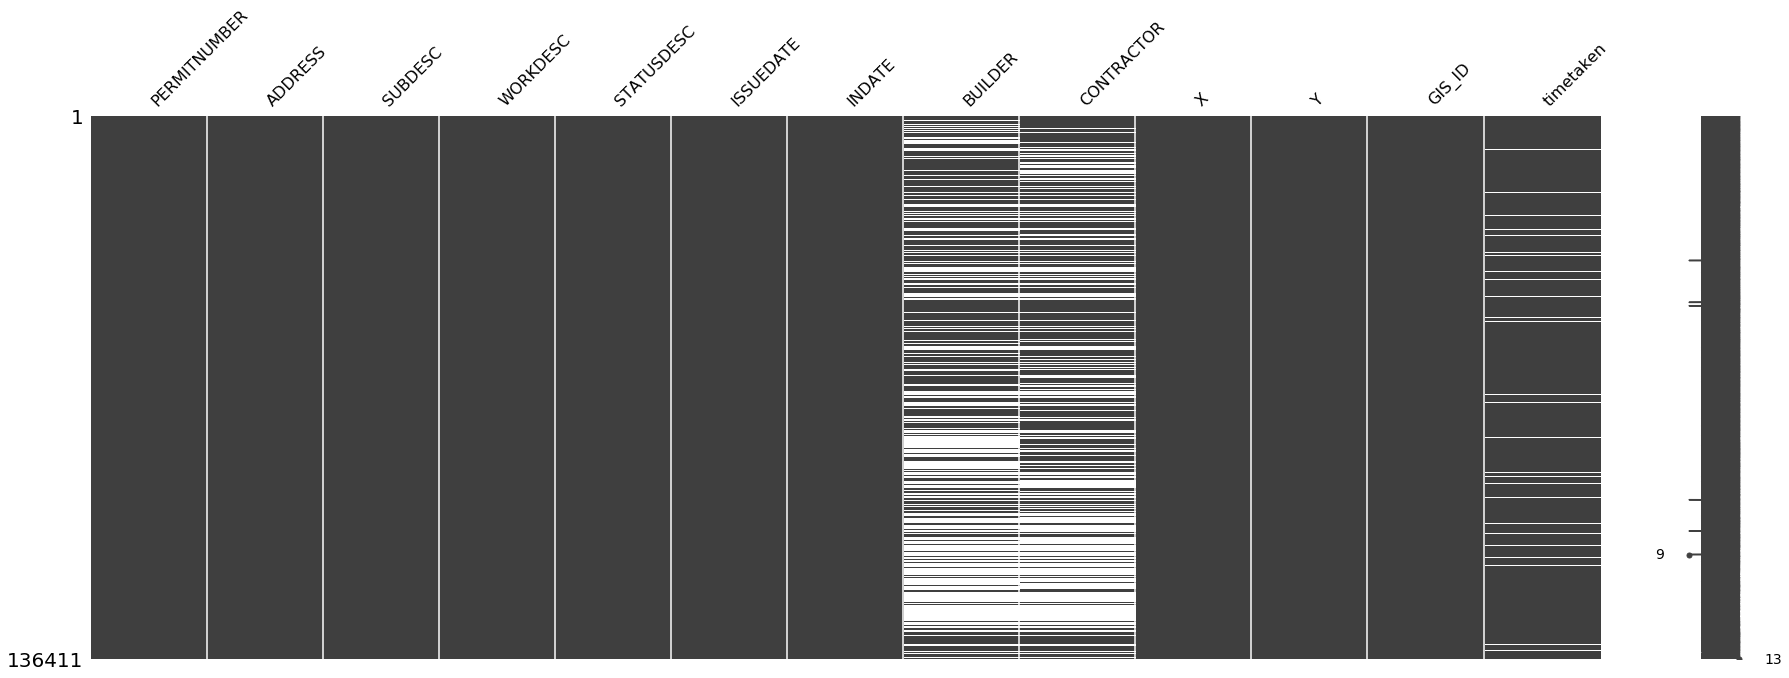

In [21]:
#Issuedate and Indate columns cleaned
missingno.matrix(df, figsize = (30,10))

### Cleaning Contractor column

In [22]:
#Fill name of builder in Contractor column where values are missing
df['CONTRACTOR'] = df['CONTRACTOR'].fillna(df['BUILDER'])

In [23]:
#We no longer need Builder and Timetaken columns so we drop them
df = df.drop('BUILDER', 1)
df = df.drop('timetaken', 1)

In [24]:
#Finding the Subdesc values that correspond to where the values are missing in the Contractor column
(df[df['CONTRACTOR'].isnull()]['SUBDESC']).value_counts()

Two Unit Dwelling              6374
Owner Occupied Property        5441
Single Family Detached         5336
Permanent                      4373
Basement Finish                3886
                               ... 
Pedestrian Bridge                 1
Demolition Implosion              1
A2: Post - Secondary School       1
Recycling Centre                  1
Class B-A Frame                   1
Name: SUBDESC, Length: 138, dtype: int64

In [25]:
#Finding the Workdesc values that correspond to where the values are missing in the Contractor column
(df[df['CONTRACTOR'].isnull()]['WORKDESC']).value_counts()

Alteration (Renovation)              18207
New                                  10779
Creating Second Unit                  6091
Change of Use - Two Unit Dwelling     5620
Revision                              5608
Interior/Unit Finish                  2986
Addition - Complete                   1643
New Complete Building                 1346
Wood                                   789
Non Residential Demolition             587
New Shell Building                     516
Residential Demolition                 461
Change of Use                          392
Phased Permit                          323
Wood and Chain Link                    105
Chain Link                             103
Foundation Only                         67
Occupancy Permit only                   55
Other                                   54
Addition Shell                          50
Wrought Iron                            31
Model Suite/No Occupant                  7
New Proposed Sign                        2
New Complet

In [26]:
#Adding 'Self' in place of missing values based on Subdesc of work performed
df.loc[(df['CONTRACTOR'].isnull()) & (df.SUBDESC.str.contains('Basement')), 'CONTRACTOR'] = 'Self'
df.loc[(df['CONTRACTOR'].isnull()) & (df.SUBDESC.str.contains('Demolition')), 'CONTRACTOR'] = 'Self'
df.loc[(df['CONTRACTOR'].isnull()) & (df.SUBDESC.str.contains('Use')), 'CONTRACTOR'] = 'Self'
df.loc[(df['CONTRACTOR'].isnull()) & (df.SUBDESC.str.contains('Foundation')), 'CONTRACTOR'] = 'Self'
df.loc[(df['CONTRACTOR'].isnull()) & (df.SUBDESC.str.contains('Other')), 'CONTRACTOR'] = 'Self'
df.loc[(df['CONTRACTOR'].isnull()) & (df.SUBDESC.str.contains('Renewal')), 'CONTRACTOR'] = 'Self'
df.loc[(df['CONTRACTOR'].isnull()) & (df.SUBDESC.str.contains('Finish')), 'CONTRACTOR'] = 'Self'
df.loc[(df['CONTRACTOR'].isnull()) & (df.SUBDESC.str.contains('Owner')), 'CONTRACTOR'] = 'Self'
df.loc[(df['CONTRACTOR'].isnull()) & (df.SUBDESC.str.contains('Retail')), 'CONTRACTOR'] = 'Self'
df.loc[(df['CONTRACTOR'].isnull()) & (df.SUBDESC.str.contains('Residential')), 'CONTRACTOR'] = 'Self'
df.loc[(df['CONTRACTOR'].isnull()) & (df.SUBDESC.str.contains('Industrial')), 'CONTRACTOR'] = 'Self'
df.loc[(df['CONTRACTOR'].isnull()) & (df.SUBDESC.str.contains('Restaurant')), 'CONTRACTOR'] = 'Self'
df.loc[(df['CONTRACTOR'].isnull()) & (df.SUBDESC.str.contains('Plumbing')), 'CONTRACTOR'] = 'Self'
df.loc[(df['CONTRACTOR'].isnull()) & (df.SUBDESC.str.contains('Door')), 'CONTRACTOR'] = 'Self'
df.loc[(df['CONTRACTOR'].isnull()) & (df.SUBDESC.str.contains('Entrance')), 'CONTRACTOR'] = 'Self'
df.loc[(df['CONTRACTOR'].isnull()) & (df.SUBDESC.str.contains('Porch')), 'CONTRACTOR'] = 'Self'
df.loc[(df['CONTRACTOR'].isnull()) & (df.SUBDESC.str.contains('Commercial')), 'CONTRACTOR'] = 'Self'
df.loc[(df['CONTRACTOR'].isnull()) & (df.SUBDESC.str.contains('Temporary')), 'CONTRACTOR'] = 'Self'
df.loc[(df['CONTRACTOR'].isnull()) & (df.SUBDESC.str.contains('Sprinkler')), 'CONTRACTOR'] = 'Self'
df.loc[(df['CONTRACTOR'].isnull()) & (df.SUBDESC.str.contains('Deck')), 'CONTRACTOR'] = 'Self'
df.loc[(df['CONTRACTOR'].isnull()) & (df.SUBDESC.str.contains('Relocation')), 'CONTRACTOR'] = 'Self'
df.loc[(df['CONTRACTOR'].isnull()) & (df.SUBDESC.str.contains('School')), 'CONTRACTOR'] = 'Self'
df.loc[(df['CONTRACTOR'].isnull()) & (df.SUBDESC.str.contains('Class')), 'CONTRACTOR'] = 'Self'
df.loc[(df['CONTRACTOR'].isnull()) & (df.SUBDESC.str.contains('Permanent')), 'CONTRACTOR'] = 'Self'
df.loc[(df['CONTRACTOR'].isnull()) & (df.SUBDESC.str.contains('Accessory')), 'CONTRACTOR'] = 'Self'
df.loc[(df['CONTRACTOR'].isnull()) & (df.SUBDESC.str.contains('Garage')), 'CONTRACTOR'] = 'Self'
df.loc[(df['CONTRACTOR'].isnull()) & (df.SUBDESC.str.contains('Service')), 'CONTRACTOR'] = 'Self'
df.loc[(df['CONTRACTOR'].isnull()) & (df.SUBDESC.str.contains('Services')), 'CONTRACTOR'] = 'Self'
df.loc[(df['CONTRACTOR'].isnull()) & (df.SUBDESC.str.contains('Solar')), 'CONTRACTOR'] = 'Self'
df.loc[(df['CONTRACTOR'].isnull()) & (df.SUBDESC.str.contains('Trailer')), 'CONTRACTOR'] = 'Self'

In [27]:
#Adding 'Self' in place of missing values based on Workdesc of work performed
df.loc[(df['CONTRACTOR'].isnull()) & (df.WORKDESC.str.contains('Finish')), 'CONTRACTOR'] = 'Self'
df.loc[(df['CONTRACTOR'].isnull()) & (df.WORKDESC.str.contains('Addition')), 'CONTRACTOR'] = 'Self'
df.loc[(df['CONTRACTOR'].isnull()) & (df.WORKDESC.str.contains('Wood')), 'CONTRACTOR'] = 'Self'
df.loc[(df['CONTRACTOR'].isnull()) & (df.WORKDESC.str.contains('Chain')), 'CONTRACTOR'] = 'Self'
df.loc[(df['CONTRACTOR'].isnull()) & (df.WORKDESC.str.contains('Wrought')), 'CONTRACTOR'] = 'Self'
df.loc[(df['CONTRACTOR'].isnull()) & (df.WORKDESC.str.contains('Shell')), 'CONTRACTOR'] = 'Self'
df.loc[(df['CONTRACTOR'].isnull()) & (df.WORKDESC.str.contains('Permit')), 'CONTRACTOR'] = 'Self'
df.loc[(df['CONTRACTOR'].isnull()) & (df.WORKDESC.str.contains('Demolition')), 'CONTRACTOR'] = 'Self'
df.loc[(df['CONTRACTOR'].isnull()) & (df.WORKDESC.str.contains('Only')), 'CONTRACTOR'] = 'Self'
df.loc[(df['CONTRACTOR'].isnull()) & (df.WORKDESC.str.contains('Other')), 'CONTRACTOR'] = 'Self'
df.loc[(df['CONTRACTOR'].isnull()) & (df.WORKDESC.str.contains('Renovation')), 'CONTRACTOR'] = 'Self'
df.loc[(df['CONTRACTOR'].isnull()) & (df.WORKDESC.str.contains('Unit')), 'CONTRACTOR'] = 'Self'
df.loc[(df['CONTRACTOR'].isnull()) & (df.WORKDESC.str.contains('Revision')), 'CONTRACTOR'] = 'Self'

In [28]:
#Number of missing values
df.isnull().sum()

PERMITNUMBER       0
ADDRESS            4
SUBDESC            0
WORKDESC           0
STATUSDESC         0
ISSUEDATE          0
INDATE             3
CONTRACTOR      1196
X                  0
Y                  0
GIS_ID             0
dtype: int64

In [29]:
#Dropping the rest of the null values since we cant do anything about them
df = df.dropna(subset = ['CONTRACTOR'])
df = df.dropna(subset = ['INDATE'])
df = df.dropna(subset = ['ADDRESS'])

In [30]:
#Dataframe is clean
df.isnull().sum()

PERMITNUMBER    0
ADDRESS         0
SUBDESC         0
WORKDESC        0
STATUSDESC      0
ISSUEDATE       0
INDATE          0
CONTRACTOR      0
X               0
Y               0
GIS_ID          0
dtype: int64

In [31]:
df.head()

,PERMITNUMBER,ADDRESS,SUBDESC,WORKDESC,STATUSDESC,ISSUEDATE,INDATE,CONTRACTOR,X,Y,GIS_ID
0,01-121747-000-00,"137 Fairhill Ave, Brampton, ON,",Single Family Detached,New Complete Building,Closed,2001-12-13,2001-11-30,1113669 ONTARIO LIMITED,-79.820498,43.689158,100753
1,01-120328-000-00,"135 Fairhill Ave, Brampton, ON,",Single Family Detached,New Complete Building,Closed,2001-12-07,2001-10-10,1113669 ONTARIO LIMITED,-79.820524,43.689064,100754
2,01-120329-000-00,"133 Fairhill Ave, Brampton, ON,",Single Family Detached,New Complete Building,Closed,2001-12-07,2001-10-10,1113669 ONTARIO LIMITED,-79.820531,43.688958,100755
3,02-126584-000-00,"131 Fairhill Ave, Brampton, ON,",Single Family Detached,New Complete Building,Closed,2002-06-20,2002-05-30,1113669 ONTARIO LIMITED,-79.820545,43.688867,100756
4,03-143093-000-00,"131 Fairhill Ave, Brampton, ON,",Single Family Detached,Revision,Closed,2003-04-04,2003-04-03,Self,-79.820545,43.688867,100756


In [33]:
#Generating CSV file with the cleaned data
df.to_csv('BuildingPermitsBramptonCleaned.csv', encoding='utf-8', index=False)